In [ ]:
# Telco Customers Churning Analysis

## Goal :

* Find out what are the drivers that are leading to customers churning
* Use the drivers to develop a machine learning model to see if features chosen result in churning

### Imports

In [ ]:
# Standard imports
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


# Prepping data imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Evaulation imports
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Stats imports
from scipy import stats

# My own imports
import acquire as a
import prepare
import explore as e
import model as m

# Time import
import time

# Itertools imports
import itertools
import operator

## Acquire

* Data was acquired from MySql database using telco_churn
* The datframe had 7043 rows and 24 columns before it was cleaned
* Rows represent telco customers 
* Columns are features that describe the customer

In [2]:
# using my acquire.py file to run the acquire_data() function
df = a.get_telco_data()

this file exists, reading csv


In [3]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
df.shape

(7043, 24)

## Prepare

* Drops unnecessary columns
* Replace empty space values with 0.0 so it can have a value,
* Filled in null values in internet_service_type
* Split into train, validate, and test dataframes

In [5]:
fresh_telco = a.get_telco_data()

this file exists, reading csv


In [6]:
fresh_telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [7]:
# using my prepare.py file to clean the data with the transformations mentioned above
df = prepare.prep_telco(fresh_telco)

In [8]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
customer_id,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check
0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check


In [9]:
# using my prepare.py file to split the data into train, validate, and test dataframes
train, validate, test = prepare.splitting_data(df, 'churn')

In [10]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
customer_id,,,,,,,,,,,,,,,,,,,,
4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,No,No,No,Yes,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic)
5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,No,No,No,No,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check
4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.95,214.75,Yes,Month-to-month,None,Mailed check
1342-JPNKI,Male,0,No,No,10,Yes,Yes,No,No,No,No,Yes,No,Yes,86.05,834.10,Yes,Month-to-month,Fiber optic,Bank transfer (automatic)
3397-AVTKU,Male,0,No,No,43,Yes,No,No,Yes,No,No,No,Yes,Yes,60.00,2548.55,No,Two year,DSL,Electronic check


In [11]:
train.shape

(4225, 20)

In [12]:
validate.shape

(1409, 20)

In [13]:
test.shape

(1409, 20)

## Explore

In [14]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
customer_id,,,,,,,,,,,,,,,,,,,,
4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,No,No,No,Yes,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic)
5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,No,No,No,No,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check
4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.95,214.75,Yes,Month-to-month,None,Mailed check
1342-JPNKI,Male,0,No,No,10,Yes,Yes,No,No,No,No,Yes,No,Yes,86.05,834.10,Yes,Month-to-month,Fiber optic,Bank transfer (automatic)
3397-AVTKU,Male,0,No,No,43,Yes,No,No,Yes,No,No,No,Yes,Yes,60.00,2548.55,No,Two year,DSL,Electronic check


In [15]:
train.info

<bound method DataFrame.info of              gender  senior_citizen partner dependents  tenure phone_service  \
customer_id                                                                    
4083-BFNYK   Female               1     Yes         No      38           Yes   
5804-LEPIM   Female               1      No         No       2           Yes   
4895-TMWIR     Male               1     Yes         No      11           Yes   
1342-JPNKI     Male               0      No         No      10           Yes   
3397-AVTKU     Male               0      No         No      43           Yes   
...             ...             ...     ...        ...     ...           ...   
1915-IOFGU   Female               0      No         No       1           Yes   
7025-WCBNE     Male               1      No         No      47           Yes   
9788-HNGUT     Male               0     Yes         No      72           Yes   
5229-PRWKT     Male               0      No         No       8           Yes   
7562-UXT

> Lets see how many customers are churning

In [16]:
train.churn.value_counts(normalize=True)

churn
No     0.734675
Yes    0.265325
Name: proportion, dtype: float64

> We can see that 27% of customers have churned

In [17]:
def countplot_churn(train):
    sns.countplot(data=train, x='churn', palette = 'prism');

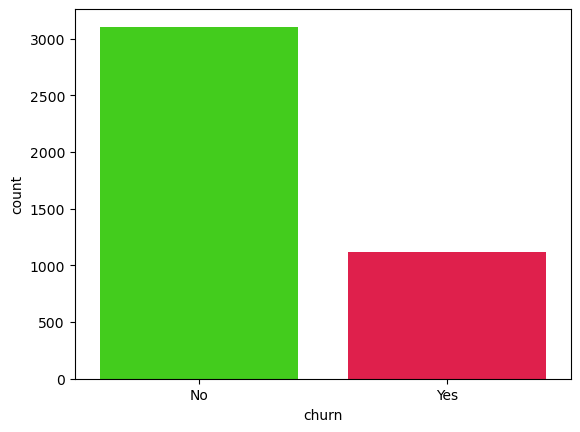

In [18]:
countplot_churn(train)

> Visualize to get a better view

### Question 1 : Does being a senior citizen affect whether or not a customer churns?

$H_o$ : There is NO relationship between being a senior citizen or not and a customer churning.

$H_a$ : There is a relationship between someone being a senior citzien or not and a customer churning.


In [19]:
# before we start we have to set the confidence level or the alpha
alpha = 0.05

In [20]:
def barplot_senior_citizen(train):
    sns.barplot(x = 'senior_citizen', y = 'churn', data = train, palette = 'prism');

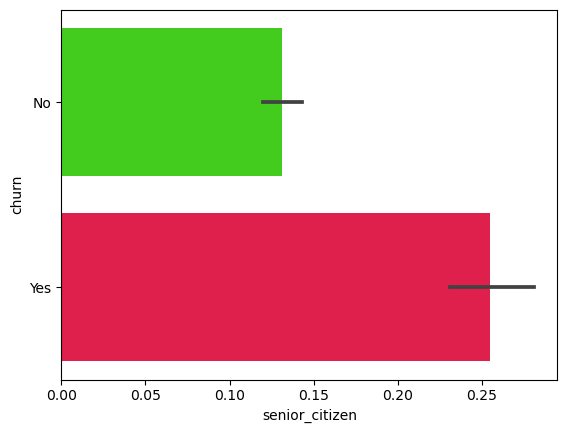

In [21]:
barplot_senior_citizen(train)

> As we can see, senior citizens have a higher churn rate than non senior citizens, so lets analyze that.

In [22]:
observed = pd.crosstab(train.churn, train.senior_citizen)
observed

senior_citizen,0,1
churn,,
No,2696,408
Yes,835,286


> Chi2 is the test we want to use since we're working with 2 categorical variables

In [23]:
# chi2 returns 4 variables
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [24]:
p

1.5271938515844278e-21

In [25]:
def chi2_senior_citizen(train):
    '''
    Performs a chi-squared test for independence between senior_ citizen and churn.
    '''
    observed = pd.crosstab(train.churn, train.senior_citizen)
    alpha = 0.05
    chi2, p, dof, expected = stats.chi2_contingency(observed)
    print(f'p-value: {p}')
    if p < alpha:
        print('We can reject our null hypothesis and say that there is a relationship between being a senior citizen and churning')
    else:
        print('We fail to reject our null hypothesis and say that there is NO relationship between being a senior citizen and churning')


In [26]:
chi2_senior_citizen(train)

p-value: 1.5271938515844278e-21
We can reject our null hypothesis and say that there is a relationship between being a senior citizen and churning


### Summarize 

There is a relationship between being a senior citizen and churning.

### Question 2: Is there a relationship between being female and churn?

In [27]:
def countplot_gender(train):
    sns.countplot(x="gender", hue="churn", data=train, palette = 'prism')

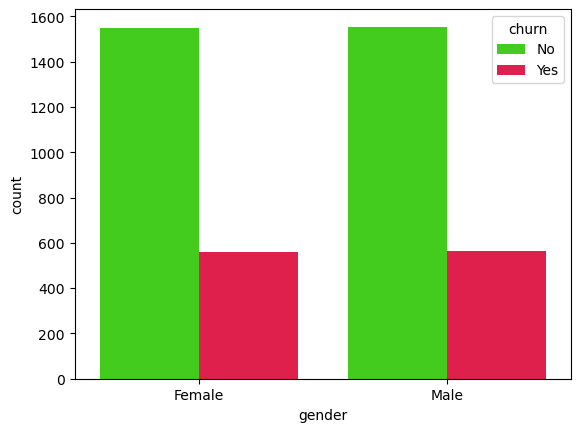

In [28]:
countplot_gender(train)

$H_o$ : There is NO relationship between contract type and churn

$H_a$: There is a relationship between contract type and churn

In [29]:
alpha = 0.05

In [30]:
observed = pd.crosstab(train.gender, train.churn)
observed

churn,No,Yes
gender,,
Female,1550,559
Male,1554,562


In [31]:
pd.crosstab(train.gender, train.churn, normalize='index')

churn,No,Yes
gender,,
Female,0.734945,0.265055
Male,0.734405,0.265595


> Another chi2 test since they're categorical values

In [32]:
def chi2_gender(train):
    observed = pd.crosstab(train.gender, train.churn)
    alpha = 0.05
    chi2, p, dof, expected = stats.chi2_contingency(observed)
    print(f'p-value: {p}')
    if p < alpha:
        print('We can reject our null hypothesis and say that there is a relationship between being a female and churn')
    else:
        print('We fail to reject our null hypothesis and say that there is NO relationship between being a female and churn')

In [33]:
chi2_gender(train)

p-value: 0.996031931504371
We fail to reject our null hypothesis and say that there is NO relationship between being a female and churn


### Summarize

There is no relationship between being a female and churn.

## Question 3: Does monthly charges affect churn?

My null and alternative hypothesis

$H_o$ : There is NO relationship between monthly charges and churn.

$H_a$: There IS a relationship between monthly charges and churn.

In [34]:
# set the alpha
alpha = 0.05

In [35]:
# Visualize

def boxplot_monthly_charges(train):
    sns.boxplot(data=train, y='monthly_charges', x='churn', palette = 'prism')
    plt.title('Do customers that churn pay more per month?')
    plt.show()

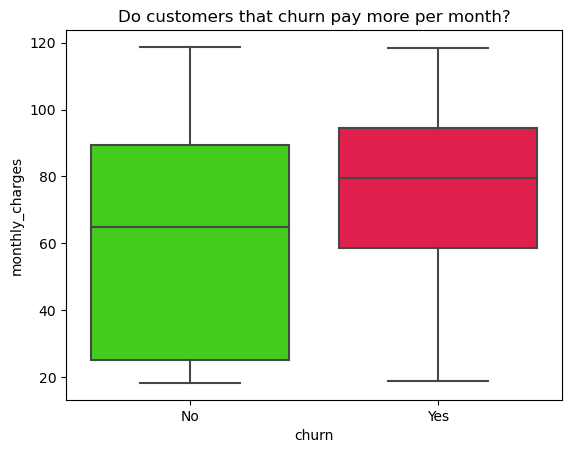

In [36]:
boxplot_monthly_charges(train)

> The median monthly charge is higher for customers that churned compared to the customers that have not churned.

# Stats test time

$H_o$ : There is NO relationship between monthly charges and churn

$H_a$ : There IS a relationship between monthly charges and churn

In [37]:
churn = train[train.churn == 'Yes'].monthly_charges

In [38]:
no_churn = train[train.churn == 'No'].monthly_charges

In [39]:
# using a two sample t-test
t, p = stats.ttest_ind(churn, no_churn)

In [40]:
p

5.279235952338065e-34

In [41]:
if p < .05:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [42]:
def ttest_monthly_charges(train):
    churn = train[train.churn == 'Yes'].monthly_charges
    no_churn = train[train.churn == 'No'].monthly_charges
    t, p = stats.ttest_ind(churn, no_churn)
    print(f'p-value: {p}')
    if p < .05:
        print("We reject the null hypothesis")
    else:
        print("We fail to reject the null hypothesis")

In [43]:
ttest_monthly_charges(train)

p-value: 5.279235952338065e-34
We reject the null hypothesis


### Summarize 

We can conclude that monthly charges does affect churn.

### Question 4: Does having dependents affect churn?

My null and alternative hypothesis

$H_o$ : There is NO relationship between having dependents and churn.

$H_a$: There IS a relationship between dependents and churn.

In [44]:
alpha = 0.05

In [45]:
def countplot_dependents(train):
    sns.countplot(data=train, x='dependents', hue='churn', palette = 'prism')
    plt.title('Does having dependents affect churn')
    plt.show();

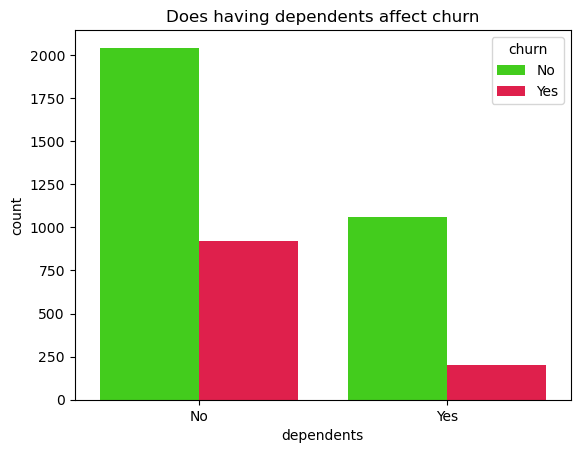

In [46]:
countplot_dependents(train)

In [47]:
observed = pd.crosstab(train.dependents, train.churn)
observed

churn,No,Yes
dependents,,
No,2042,919
Yes,1062,202


In [48]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [49]:
def chi2_dependents(train):
    observed = pd.crosstab(train.contract_type, train.churn)
    alpha = 0.05
    chi2, p, dof, expected = stats.chi2_contingency(observed)
    print(f'p-value: {p}')
    if p < alpha:
        print('We can reject our null hypothesis and say that there is a relationship between dependents and churn')
    else:
        print('We fail to reject our null hypothesis and say that there is NO relationship between dependents and churn')

In [50]:
chi2_dependents(train)

p-value: 8.298049251133243e-156
We can reject our null hypothesis and say that there is a relationship between dependents and churn


#### Moving forward

> The features I will be moving forward with are senior citizens, monthly contracts, and dependents. 

### Modeling

In [51]:
# Get the baseline
train.churn.value_counts(normalize=True)

churn
No     0.734675
Yes    0.265325
Name: proportion, dtype: float64

> baseline accuracy is 73%

In [52]:
### Time to encode

train_encoded, validate_encoded, test_encoded = prepare.preprocess_telco(train, validate, test)

In [53]:
train_encoded.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
customer_id,,,,,,,,,,,,,,,,,,,,,
4083-BFNYK,1,38,95.00,3591.25,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
5804-LEPIM,1,2,70.35,139.05,0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
4895-TMWIR,1,11,19.95,214.75,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
1342-JPNKI,0,10,86.05,834.10,1,0,0,1,0,1,...,0,1,1,0,0,1,0,0,0,0
3397-AVTKU,0,43,60.00,2548.55,1,0,0,1,0,0,...,1,1,0,0,1,0,0,0,1,0


##### Define X and y

In [54]:
# Determine X (also means determine the features)

X_train = train_encoded.drop(columns='churn_Yes')
X_validate = validate_encoded.drop(columns='churn_Yes')
X_test = test_encoded.drop(columns='churn_Yes')

In [55]:
# Determine y (also mean determine the target variable)

y_train = train_encoded.churn_Yes
y_validate = validate_encoded.churn_Yes
y_test = test_encoded.churn_Yes

### Let's start with Logistic Regression

In [56]:
# The features that are going to be modeled

features = ['senior_citizen', 'monthly_charges', 'dependents_Yes']
X_train[features].head()

,senior_citizen,monthly_charges,dependents_Yes
customer_id,,,
4083-BFNYK,1,95.00,0
5804-LEPIM,1,70.35,0
4895-TMWIR,1,19.95,0
1342-JPNKI,0,86.05,0
3397-AVTKU,0,60.00,0


In [57]:
# Make and fit the model

logr = LogisticRegression()

logr.fit(X_train[features], y_train)

LogisticRegression()

In [58]:
# Calculate and return the accuracy score of the Logistic Regression 

logr.score(X_train[features], y_train)

0.7256804733727811

> Since the model's accuracy score is close to our baseline, we will not use this model.

### Random Forest

In [91]:
# initializes an empty list named stats. Creates a for-loop that iterates 10 times each time changing max depth and min leaf samples. Then appends to the list and prints out results.
stats = []

for x in range(1,21):
    rf = RandomForestClassifier(min_samples_leaf=x, max_depth=21-x, random_state=123)

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_train)

    acc = rf.score(X_train, y_train)
    acc_val = rf.score(X_validate, y_validate)
    
    stats.append([x,21-x,round(acc,2),round(acc_val,2) ]) 
    
    print(f'min_leaf_samples = {x}, max_depth = {21-x}, accuracy train = {round(acc,3)}, val = {round(acc_val,3)}')

min_leaf_samples = 1, max_depth = 20, accuracy train = 0.998, val = 0.789
min_leaf_samples = 2, max_depth = 19, accuracy train = 0.928, val = 0.801
min_leaf_samples = 3, max_depth = 18, accuracy train = 0.89, val = 0.801
min_leaf_samples = 4, max_depth = 17, accuracy train = 0.868, val = 0.806
min_leaf_samples = 5, max_depth = 16, accuracy train = 0.859, val = 0.808
min_leaf_samples = 6, max_depth = 15, accuracy train = 0.849, val = 0.809
min_leaf_samples = 7, max_depth = 14, accuracy train = 0.843, val = 0.801
min_leaf_samples = 8, max_depth = 13, accuracy train = 0.839, val = 0.801
min_leaf_samples = 9, max_depth = 12, accuracy train = 0.835, val = 0.803
min_leaf_samples = 10, max_depth = 11, accuracy train = 0.83, val = 0.804
min_leaf_samples = 11, max_depth = 10, accuracy train = 0.827, val = 0.804
min_leaf_samples = 12, max_depth = 9, accuracy train = 0.823, val = 0.808
min_leaf_samples = 13, max_depth = 8, accuracy train = 0.817, val = 0.806
min_leaf_samples = 14, max_depth = 7, 

In [92]:
stats_df = pd.DataFrame(stats, columns = ['min_leaf', 'max_depth', 'train_acc', 'val_acc'])
stats_df                                       

,min_leaf,max_depth,train_acc,val_acc
0,1,20,1.00,0.79
1,2,19,0.93,0.80
2,3,18,0.89,0.80
3,4,17,0.87,0.81
4,5,16,0.86,0.81
5,6,15,0.85,0.81
6,7,14,0.84,0.80
7,8,13,0.84,0.80
8,9,12,0.83,0.80
9,10,11,0.83,0.80


In [93]:
stats_df.sort_values('val_acc', ascending=False)

,min_leaf,max_depth,train_acc,val_acc
3,4,17,0.87,0.81
4,5,16,0.86,0.81
5,6,15,0.85,0.81
11,12,9,0.82,0.81
12,13,8,0.82,0.81
10,11,10,0.83,0.80
2,3,18,0.89,0.80
6,7,14,0.84,0.80
7,8,13,0.84,0.80
8,9,12,0.83,0.80


> Choosing to go with min_leaf of 6 with a max_depth of 15 to be conservative of not being overfit

### Decision Tree

In [95]:
# creates a for loop iterating 20 times with a different max depth each iteration.
for x in range(1,21):
    #create the decision tree object
    tree = DecisionTreeClassifier(max_depth=x)
    
    #fit the object only on TRAIN DATA!
    tree.fit(X_train, y_train)
    
    #calculate the accuracy for train and validate
    acc = tree.score(X_train, y_train)
    acc_v = tree.score(X_validate, y_validate)
    
    print(f'max depth of {x}, the accuracy train = {round(acc,4)}, val = {round(acc_v,4)}')

max depth of 1, the accuracy train = 0.7359, val = 0.7253
max depth of 2, the accuracy train = 0.7837, val = 0.7878
max depth of 3, the accuracy train = 0.7837, val = 0.7878
max depth of 4, the accuracy train = 0.7927, val = 0.7771
max depth of 5, the accuracy train = 0.8024, val = 0.7921
max depth of 6, the accuracy train = 0.8107, val = 0.7885
max depth of 7, the accuracy train = 0.826, val = 0.7857
max depth of 8, the accuracy train = 0.8402, val = 0.7899
max depth of 9, the accuracy train = 0.8604, val = 0.7828
max depth of 10, the accuracy train = 0.8847, val = 0.7622
max depth of 11, the accuracy train = 0.9044, val = 0.7573
max depth of 12, the accuracy train = 0.9236, val = 0.753
max depth of 13, the accuracy train = 0.9413, val = 0.7516
max depth of 14, the accuracy train = 0.9529, val = 0.7566
max depth of 15, the accuracy train = 0.965, val = 0.7445
max depth of 16, the accuracy train = 0.9725, val = 0.7331
max depth of 17, the accuracy train = 0.9768, val = 0.7346
max depth

> Choosing to go with max depth of 3 to be conservative of not being overfit

### Evaluation

* After checking the accuracies of the the models, Random Forest was the best one

* Random Forest will be used as our final model for the test data evaluation

In [98]:
# creates the random forest object
rf = RandomForestClassifier(min_samples_leaf=6, max_depth=15, random_state=123)

# fits the object only on train data
rf.fit(X_train, y_train)

# saves the predictions of X_test to a variable y_pred
y_pred = rf.predict(X_test)

# calculates the accuracy for test
acc_test = rf.score(X_test, y_test)

print(f'min_leaf_samples = 6, max_depth = 15, accuracy test = {round(acc_test,3)}')

min_leaf_samples = 6, max_depth = 15, accuracy test = 0.803


The final model's score is 80%, which is higher than the baseline.

### Conclusion

#### Recommendations

> For customers who are have high monthly charges, I would recommened providing targeted retention offers, such as discounts or additional services, to incentivize them to stay.

> For customers who do not have dependents, maybe creating customized offers or promotions that align with the lifestyle of individuals without dependents will encourage them to stay.

> For customers who are senior citizens, Providing personalized and patient customer support that caters to the specific needs of senior citizens could help reduce the churn of customers who are senior citizens.

### Next Steps

* With more time, I could look deeper into monthly charges and check to see what exactly is causing their high charges.

* Come back to the model and update it with any new findings.

In [101]:
test.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
customer_id,,,,,,,,,,,,,,,,,,,,
6941-KXRRV,Female,1,Yes,No,48,Yes,No,No,Yes,No,No,No,Yes,Yes,58.95,2789.70,No,One year,DSL,Bank transfer (automatic)
0206-OYVOC,Female,0,Yes,Yes,46,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,19.25,864.20,No,Two year,None,Mailed check
7442-YGZFK,Male,0,No,No,1,Yes,Yes,No,No,No,No,No,No,Yes,49.80,49.80,No,Month-to-month,DSL,Credit card (automatic)
9018-PCIOK,Female,0,No,No,55,Yes,No,No,Yes,Yes,No,No,Yes,Yes,64.75,3617.10,No,Two year,DSL,Mailed check
1591-MQJTP,Male,1,Yes,No,51,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,93.65,4839.15,No,One year,Fiber optic,Bank transfer (automatic)


In [107]:
test = test.reset_index()

In [108]:
test.head(1)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,6941-KXRRV,Female,1,Yes,No,48,Yes,No,No,Yes,...,No,No,Yes,Yes,58.95,2789.7,No,One year,DSL,Bank transfer (automatic)


In [110]:
# Make predictions on the test set
test_prob = rf.predict_proba(X_test)
test_pred = rf.predict(X_test)

# Round the probabilities to 2 decimal places
rounded_test_prob = np.round(test_prob[:, 1], 2)

# Create a DataFrame with predictions
pred_df = pd.DataFrame({
    'customer_id': test['customer_id'],
    'probability_of_churn': rounded_test_prob,  # Assuming 1 is the index for the positive class
    'prediction_of_churn': test_pred
})

# Save the predictions to a CSV file
pred_df.to_csv('predictions.csv', index=False)
print('Export complete.')

Export complete.
